In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!ls data/

OEM_Emergency_Notifications.csv   tweets_3.csv
OEM_Non_Outages.csv               tweets_pseg_dec13_sep20.csv
final_df.csv                      tweets_pseg_jun27_apr06.csv
nlp_tweets.csv                    tweets_pseg_sep6_july2
nlp_tweets_2012_2017.csv          weather_target_drop_merged.csv
non_outages.csv                   weather_target_merged.csv
open_nyc.csv                      weather_target_numerical.csv
target.csv                        weather_target_numerical_drop.csv
tweets.csv                        working_df.csv
tweets_2.csv


In [3]:
df = pd.read_csv('./data/weather_target_numerical_drop.csv')

In [4]:
df.shape

(6215, 58)

In [5]:
df.head(2)

datetime  aerial_(fly-over)  drills/exercises  environmental  \
0  2012-10-02 00:00:00                  0                 0              0   
1  2012-10-02 03:00:00                  0                 0              0   

   fire  infrastructure  mass_transit_disruption  mass_transit_restoration  \
0     0               0                        0                         0   
1     0               0                        0                         0   

   missing_adult  missing_child/adolescent  ...  smoke  snow  squalls  \
0              0                         0  ...      0     0        0   
1              0                         0  ...      0     0        0   

   thunderstorm  thunderstorm_with_heavy_rain  \
0             0                             0   
1             0                             0   

   thunderstorm_with_light_drizzle  thunderstorm_with_light_rain  \
0                                0                             0   
1                                0                             0   

   thunderstorm_with_rain  very_heavy_rain  outage  
0                       0                0       0  
1                       0                0       0  

[2 rows x 58 columns]

In [6]:
df['datetime'].dtypes

dtype('O')

In [7]:
df.groupby('outage').mean().T

outage                                        0           1
aerial_(fly-over)                      0.023990    0.000000
drills/exercises                       0.027787    0.000000
environmental                          0.079220    0.000000
fire                                   0.052468    0.000000
infrastructure                         0.000345    0.000000
mass_transit_disruption                0.167932    0.002375
mass_transit_restoration               0.021229    0.000000
missing_adult                          0.120297    0.000000
missing_child/adolescent               0.014325    0.000000
parking                                0.009493    0.000000
public_awareness                       0.084052    0.000000
public_health                          0.023300    0.000000
road_closure                           0.281326    0.002375
school_notification                    0.015533    0.000000
structural                             0.002244    0.000000
utility                                0.018122    0.995249
weather                                0.058336    0.000000
temperature_f                         54.977679   58.847933
wind_dir_degrees                     194.561788  185.969121
wind_speed_mph                         6.754746    7.045131
broken_clouds                          0.131688    0.097387
drizzle                                0.005178    0.009501
dust                                   0.000863    0.002375
few_clouds                             0.075078    0.066508
fog                                    0.031239    0.052257
freezing_rain                          0.000173    0.000000
haze                                   0.018985    0.016627
heavy_intensity_drizzle                0.000518    0.000000
heavy_intensity_rain                   0.010528    0.002375
heavy_snow                             0.002416    0.002375
heavy_thunderstorm                     0.000000    0.000000
light_intensity_drizzle                0.009838    0.021378
light_intensity_shower_rain            0.000000    0.000000
light_rain                             0.103555    0.104513
light_rain_and_snow                    0.000345    0.000000
light_snow                             0.009665    0.011876
mist                                   0.135830    0.185273
moderate_rain                          0.024853    0.045131
overcast_clouds                        0.098378    0.078385
proximity_thunderstorm                 0.002589    0.009501
proximity_thunderstorm_with_drizzle    0.000000    0.000000
proximity_thunderstorm_with_rain       0.000173    0.000000
sand                                   0.000000    0.000000
sand/dust_whirls                       0.000000    0.000000
scattered_clouds                       0.095789    0.090261
shower_rain                            0.000000    0.000000
sky_is_clear                           0.235071    0.194774
smoke                                  0.000173    0.000000
snow                                   0.001726    0.000000
squalls                                0.000345    0.000000
thunderstorm                           0.002244    0.002375
thunderstorm_with_heavy_rain           0.000173    0.002375
thunderstorm_with_light_drizzle        0.000000    0.000000
thunderstorm_with_light_rain           0.000690    0.000000
thunderstorm_with_rain                 0.000173    0.000000
very_heavy_rain                        0.001726    0.004751

In [8]:
# df.groupby('outage').mean().T < 0.5

In [9]:
df['wind_speed_mph'].groupby(df['outage']).mean()

outage
0    6.754746
1    7.045131
Name: wind_speed_mph, dtype: float64

In [10]:
df.datetime = pd.to_datetime(df.datetime)

In [11]:
date_df = df.set_index('datetime').sort_index()

In [12]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [13]:
p = figure(plot_width=400, plot_height=400, x_axis_type="datetime")
p.line(date_df.index, date_df['temperature_f'])

GlyphRenderer(id='1037', ...)

In [14]:
show(p)

In [15]:
date_df.index

DatetimeIndex(['2012-10-02 00:00:00', '2012-10-02 03:00:00',
               '2012-10-02 12:00:00', '2012-10-02 14:00:00',
               '2012-10-03 08:00:00', '2012-10-03 15:00:00',
               '2012-10-04 05:00:00', '2012-10-04 06:00:00',
               '2012-10-04 07:00:00', '2012-10-04 09:00:00',
               ...
               '2017-10-24 07:00:00', '2017-10-24 15:00:00',
               '2017-10-25 12:00:00', '2017-10-25 17:00:00',
               '2017-10-26 15:00:00', '2017-10-27 03:00:00',
               '2017-10-27 09:00:00', '2017-10-27 15:00:00',
               '2017-10-27 17:00:00', '2017-10-27 20:00:00'],
              dtype='datetime64[ns]', name='datetime', length=6215, freq=None)

In [16]:
df_13 = date_df[(date_df.index > '2013-01-01') & (date_df.index < '2013-12-31')]

In [17]:
p13 = figure(plot_width=550, plot_height=400, x_axis_type="datetime")
p13.line(df_13.index, df_13['temperature_f'])
show(p13)

In [18]:
# date_df.outage[date_df.outage == 1]

/Users/ixchelfragoso/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 1440x720 with 0 Axes>

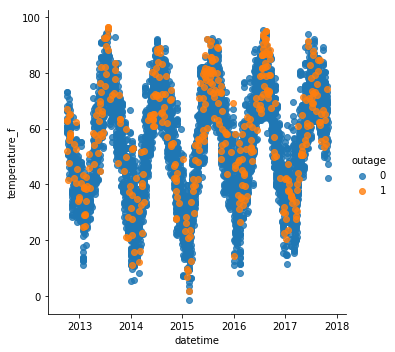

In [19]:
import seaborn as sns
plt.figure(figsize = (20, 10))
sns.lmplot('datetime', 'temperature_f', df, hue='outage', fit_reg=False)
# fig = plt.gcf()
# fig.set_size_inches(25, 20)
# plt.show()

<Figure size 1440x720 with 0 Axes>

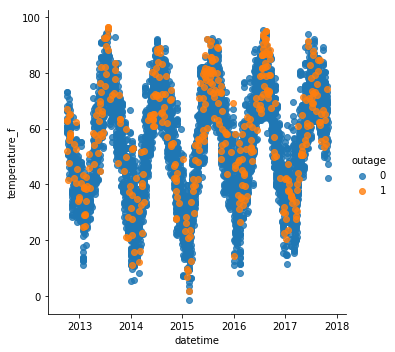

In [20]:
import seaborn as sns
plt.figure(figsize = (20, 10))
sns.lmplot('datetime', 'temperature_f', df, hue='outage', fit_reg=False);
# fig = plt.gcf()
# fig.set_size_inches(25, 20)
# plt.show()

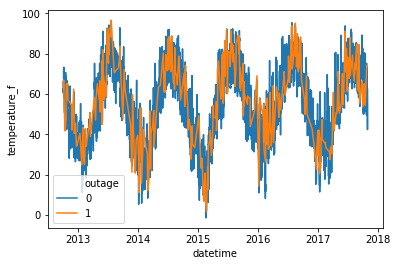

In [21]:
ax = sns.lineplot(x=date_df.index, y="temperature_f", hue="outage", data=date_df)

In [22]:
date_df[date_df['outage'] == 1].index

DatetimeIndex(['2012-10-04 05:00:00', '2012-10-04 10:00:00',
               '2012-10-04 15:00:00', '2012-10-08 15:00:00',
               '2012-10-13 11:00:00', '2012-10-19 03:00:00',
               '2012-10-19 14:00:00', '2012-10-21 00:00:00',
               '2012-10-27 18:00:00', '2012-10-29 07:00:00',
               ...
               '2017-09-05 19:00:00', '2017-09-07 15:00:00',
               '2017-09-09 12:00:00', '2017-09-24 07:00:00',
               '2017-09-29 12:00:00', '2017-10-07 12:00:00',
               '2017-10-12 05:00:00', '2017-10-12 12:00:00',
               '2017-10-13 13:00:00', '2017-10-22 19:00:00'],
              dtype='datetime64[ns]', name='datetime', length=421, freq=None)

In [23]:
date_df.columns

Index(['aerial_(fly-over)', 'drills/exercises', 'environmental', 'fire',
       'infrastructure', 'mass_transit_disruption', 'mass_transit_restoration',
       'missing_adult', 'missing_child/adolescent', 'parking',
       'public_awareness', 'public_health', 'road_closure',
       'school_notification', 'structural', 'utility', 'weather',
       'temperature_f', 'wind_dir_degrees', 'wind_speed_mph', 'broken_clouds',
       'drizzle', 'dust', 'few_clouds', 'fog', 'freezing_rain', 'haze',
       'heavy_intensity_drizzle', 'heavy_intensity_rain', 'heavy_snow',
       'heavy_thunderstorm', 'light_intensity_drizzle',
       'light_intensity_shower_rain', 'light_rain', 'light_rain_and_snow',
       'light_snow', 'mist', 'moderate_rain', 'overcast_clouds',
       'proximity_thunderstorm', 'proximity_thunderstorm_with_drizzle',
       'proximity_thunderstorm_with_rain', 'sand', 'sand/dust_whirls',
       'scattered_clouds', 'shower_rain', 'sky_is_clear', 'smoke', 'snow',
       'squalls', 'th

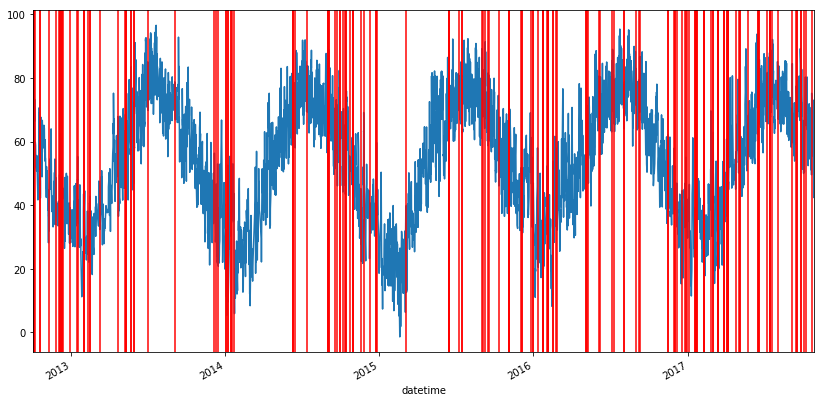

In [24]:
date_df.temperature_f.plot(figsize = (14, 7))
vlines = date_df[date_df['fog'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'red')

In [25]:
dates = date_df.index.to_list()

In [26]:
outages = date_df.outage.to_list()

In [27]:
outage_coord = list(zip(dates, outages))

In [28]:
len(outage_coord)

6215

In [29]:
# x = []
# for i in range(6217):
#     for coordinate in outage_coord:
#         print(coordinate[i])

In [30]:
outage_coord[0][0]

Timestamp('2012-10-02 00:00:00')

In [31]:
outage_coord

[(Timestamp('2012-10-02 00:00:00'), 0),
 (Timestamp('2012-10-02 03:00:00'), 0),
 (Timestamp('2012-10-02 12:00:00'), 0),
 (Timestamp('2012-10-02 14:00:00'), 0),
 (Timestamp('2012-10-03 08:00:00'), 0),
 (Timestamp('2012-10-03 15:00:00'), 0),
 (Timestamp('2012-10-04 05:00:00'), 1),
 (Timestamp('2012-10-04 06:00:00'), 0),
 (Timestamp('2012-10-04 07:00:00'), 0),
 (Timestamp('2012-10-04 09:00:00'), 0),
 (Timestamp('2012-10-04 10:00:00'), 1),
 (Timestamp('2012-10-04 12:00:00'), 0),
 (Timestamp('2012-10-04 15:00:00'), 1),
 (Timestamp('2012-10-04 18:00:00'), 0),
 (Timestamp('2012-10-05 07:00:00'), 0),
 (Timestamp('2012-10-05 12:00:00'), 0),
 (Timestamp('2012-10-05 18:00:00'), 0),
 (Timestamp('2012-10-05 19:00:00'), 0),
 (Timestamp('2012-10-06 10:00:00'), 0),
 (Timestamp('2012-10-06 12:00:00'), 0),
 (Timestamp('2012-10-07 08:00:00'), 0),
 (Timestamp('2012-10-07 23:00:00'), 0),
 (Timestamp('2012-10-08 15:00:00'), 1),
 (Timestamp('2012-10-10 08:00:00'), 0),
 (Timestamp('2012-10-10 16:00:00'), 0),


In [32]:
one = date_df[date_df['outage'] == 1]

In [33]:
zero = date_df[date_df['outage'] == 0]

In [34]:
temp_1 = one.loc[:, ['temperature_f']]

In [35]:
temp_0 = zero.loc[:, ['temperature_f']]

In [36]:
date_df.loc[:, ['outage', 'temperature_f']].head()

outage  temperature_f
datetime                                  
2012-10-02 00:00:00       0          60.58
2012-10-02 03:00:00       0          61.01
2012-10-02 12:00:00       0          62.29
2012-10-02 14:00:00       0          62.58
2012-10-03 08:00:00       0          60.82

In [37]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


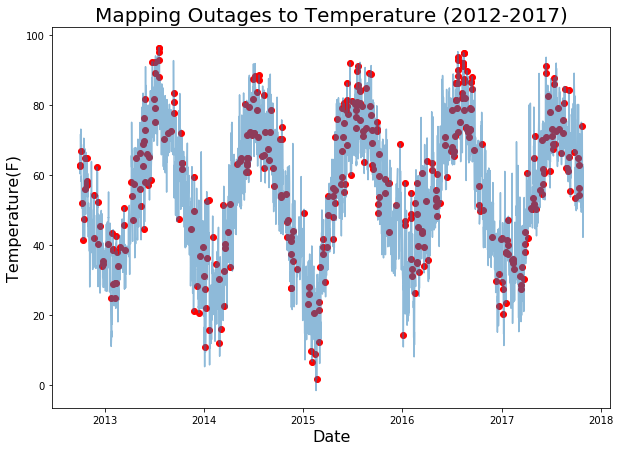

In [38]:
plt.figure(figsize=(10, 7))
plt.plot(date_df.temperature_f, alpha = 0.5)
plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages to Temperature (2012-2017)', fontsize=20)

plt.savefig('./images/outages_temp.png')

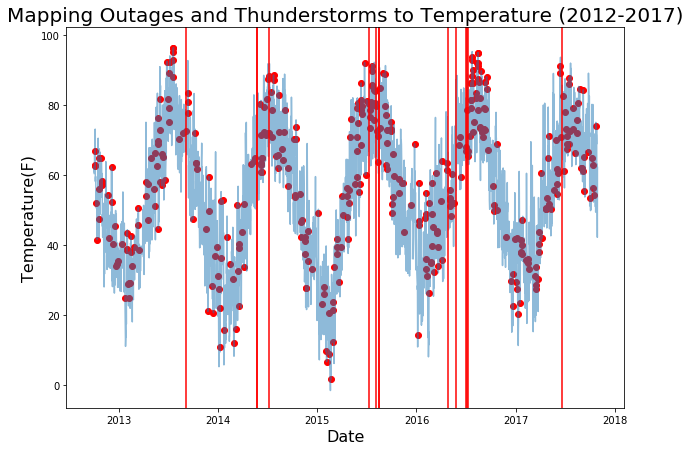

In [39]:
plt.figure(figsize=(10, 7))
plt.plot(date_df.temperature_f, alpha = 0.5)
plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')
vlines = date_df[date_df['thunderstorm'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'red')
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages and Thunderstorms to Temperature (2012-2017)', fontsize=20)


plt.savefig('./images/outages_temp_thunderstorms.png')

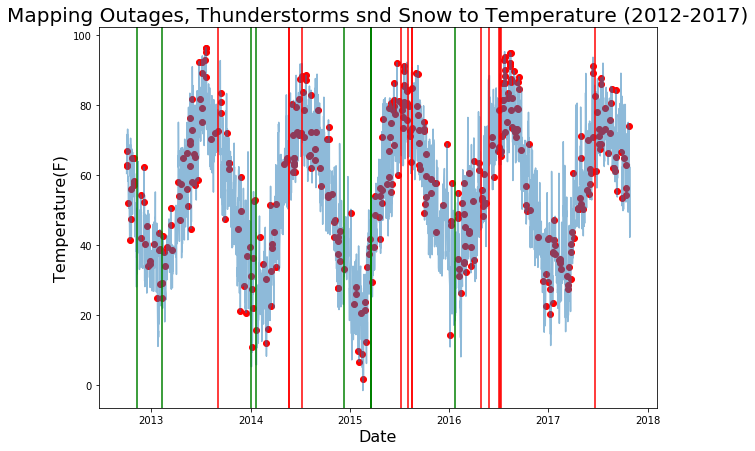

In [40]:
plt.figure(figsize=(10, 7))
plt.plot(date_df.temperature_f, alpha = 0.5)
plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')
vlines = date_df[date_df['thunderstorm'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'red')
s_vlines = date_df[date_df['snow'] == 1].index
for s_line in s_vlines:
    plt.axvline(s_line, color = 'green')
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages, Thunderstorms snd Snow to Temperature (2012-2017)', fontsize=20)


plt.savefig('./images/outages_temp_thunderstorms_snow.png')

In [41]:
date_df.columns

Index(['aerial_(fly-over)', 'drills/exercises', 'environmental', 'fire',
       'infrastructure', 'mass_transit_disruption', 'mass_transit_restoration',
       'missing_adult', 'missing_child/adolescent', 'parking',
       'public_awareness', 'public_health', 'road_closure',
       'school_notification', 'structural', 'utility', 'weather',
       'temperature_f', 'wind_dir_degrees', 'wind_speed_mph', 'broken_clouds',
       'drizzle', 'dust', 'few_clouds', 'fog', 'freezing_rain', 'haze',
       'heavy_intensity_drizzle', 'heavy_intensity_rain', 'heavy_snow',
       'heavy_thunderstorm', 'light_intensity_drizzle',
       'light_intensity_shower_rain', 'light_rain', 'light_rain_and_snow',
       'light_snow', 'mist', 'moderate_rain', 'overcast_clouds',
       'proximity_thunderstorm', 'proximity_thunderstorm_with_drizzle',
       'proximity_thunderstorm_with_rain', 'sand', 'sand/dust_whirls',
       'scattered_clouds', 'shower_rain', 'sky_is_clear', 'smoke', 'snow',
       'squalls', 'th

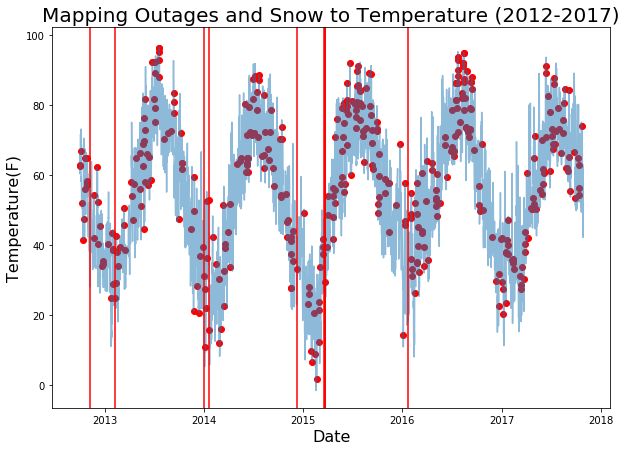

In [42]:
plt.figure(figsize=(10, 7))
plt.plot(date_df.temperature_f, alpha = 0.5)
plt.scatter(temp_1.index, temp_1['temperature_f'], c ='r')
vlines = date_df[date_df['snow'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'red')
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages and Snow to Temperature (2012-2017)', fontsize=20)


plt.savefig('./images/outages_temp_snow.png')

In [43]:
# date_df.temperature_f.resample('M').mean().plot()

In [44]:
df_15_17 = date_df[(date_df.index > '2015-01-01') & (date_df.index < '2017-12-31')]

In [45]:
temp_one_15_17 = temp_1[(temp_1.index > '2015-01-01') & (temp_1.index < '2017-12-31')]

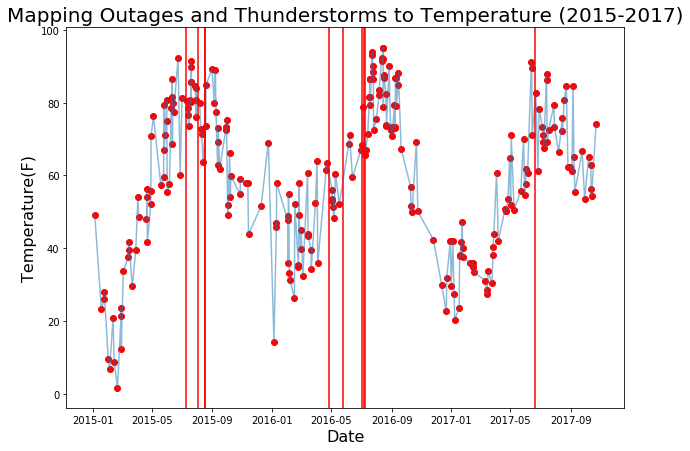

In [46]:
plt.figure(figsize=(10, 7))
plt.plot(temp_one_15_17.temperature_f, alpha = 0.5)
plt.scatter(temp_one_15_17.index, temp_one_15_17['temperature_f'], c ='r')
vlines = df_15_17[df_15_17['thunderstorm'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'red')
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages and Thunderstorms to Temperature (2015-2017)', fontsize=20)


plt.savefig('./images/outages_temp_thunderstorms_15_17.png')

In [47]:
df_15_16 = date_df[(date_df.index > '2015-01-01') & (date_df.index < '2016-12-31')]

In [48]:
temp_one_15_16 = temp_1[(temp_1.index > '2015-01-01') & (temp_1.index < '2016-12-31')]

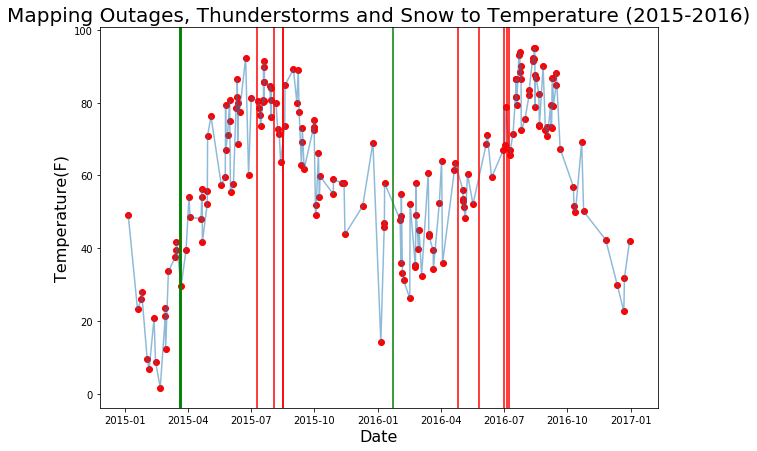

In [49]:
plt.figure(figsize=(10, 7))
plt.plot(temp_one_15_16.temperature_f, alpha = 0.5)
plt.scatter(temp_one_15_16.index, temp_one_15_16['temperature_f'], c ='r')
vlines = df_15_16[df_15_16['thunderstorm'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'red')
s_vlines = df_15_16[df_15_16['snow'] == 1].index
for s_line in s_vlines:
    plt.axvline(s_line, color = 'green')
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages, Thunderstorms and Snow to Temperature (2015-2016)', fontsize=20)


plt.savefig('./images/outages_temp_thunderstorms_snow_15_16.png')

In [50]:
one.columns

Index(['aerial_(fly-over)', 'drills/exercises', 'environmental', 'fire',
       'infrastructure', 'mass_transit_disruption', 'mass_transit_restoration',
       'missing_adult', 'missing_child/adolescent', 'parking',
       'public_awareness', 'public_health', 'road_closure',
       'school_notification', 'structural', 'utility', 'weather',
       'temperature_f', 'wind_dir_degrees', 'wind_speed_mph', 'broken_clouds',
       'drizzle', 'dust', 'few_clouds', 'fog', 'freezing_rain', 'haze',
       'heavy_intensity_drizzle', 'heavy_intensity_rain', 'heavy_snow',
       'heavy_thunderstorm', 'light_intensity_drizzle',
       'light_intensity_shower_rain', 'light_rain', 'light_rain_and_snow',
       'light_snow', 'mist', 'moderate_rain', 'overcast_clouds',
       'proximity_thunderstorm', 'proximity_thunderstorm_with_drizzle',
       'proximity_thunderstorm_with_rain', 'sand', 'sand/dust_whirls',
       'scattered_clouds', 'shower_rain', 'sky_is_clear', 'smoke', 'snow',
       'squalls', 'th

In [51]:
wind_1 = one.loc[:, ['wind_speed_mph']]

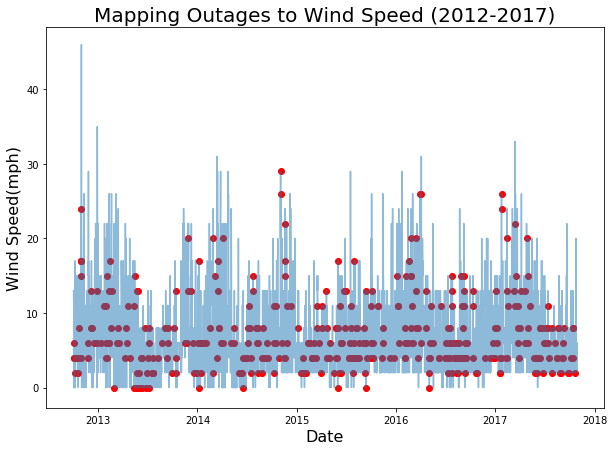

In [52]:
plt.figure(figsize=(10, 7))
plt.plot(date_df.wind_speed_mph, alpha = 0.5)
plt.scatter(wind_1.index, wind_1['wind_speed_mph'], c ='r')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Wind Speed(mph)', fontsize=16)
plt.title('Mapping Outages to Wind Speed (2012-2017)', fontsize=20)

plt.savefig('./images/outages_wind_speed.png')

In [53]:
!ls Weather/data

historical_hourly_weather_data       new_york_weather_dropped_col.csv
new_york_weather.csv                 new_york_weather_with_fahrenheit.csv
new_york_weather_all_numerical.csv   weather_clean.csv
new_york_weather_date_index.csv


In [54]:
weather = pd.read_csv('./Weather/data/weather_clean.csv')

In [55]:
weather.columns

Index(['date', 'temperature_f', 'wind_dir_degrees', 'wind_speed_mph',
       'broken_clouds', 'drizzle', 'dust', 'few_clouds', 'fog',
       'freezing_rain', 'haze', 'heavy_intensity_drizzle',
       'heavy_intensity_rain', 'heavy_snow', 'heavy_thunderstorm',
       'light_intensity_drizzle', 'light_intensity_shower_rain', 'light_rain',
       'light_rain_and_snow', 'light_snow', 'mist', 'moderate_rain',
       'overcast_clouds', 'proximity_thunderstorm',
       'proximity_thunderstorm_with_drizzle',
       'proximity_thunderstorm_with_rain', 'sand', 'sand/dust_whirls',
       'scattered_clouds', 'shower_rain', 'sky_is_clear', 'smoke', 'snow',
       'squalls', 'thunderstorm', 'thunderstorm_with_heavy_rain',
       'thunderstorm_with_light_drizzle', 'thunderstorm_with_light_rain',
       'thunderstorm_with_rain', 'very_heavy_rain'],
      dtype='object')

In [56]:
# weather.wind_speed_mph
weather.head()

date  temperature_f  wind_dir_degrees  wind_speed_mph  \
0  2012-10-01 13:00:00          59.11             260.0              15   
1  2012-10-01 14:00:00          59.16             260.0              15   
2  2012-10-01 15:00:00          59.30             260.0              15   
3  2012-10-01 16:00:00          59.44             260.0              15   
4  2012-10-01 17:00:00          59.58             261.0              13   

   broken_clouds  drizzle  dust  few_clouds  fog  freezing_rain  ...  \
0              0        0     0           1    0              0  ...   
1              0        0     0           1    0              0  ...   
2              0        0     0           1    0              0  ...   
3              0        0     0           1    0              0  ...   
4              0        0     0           1    0              0  ...   

   sky_is_clear  smoke  snow  squalls  thunderstorm  \
0             0      0     0        0             0   
1             0      0     0        0             0   
2             0      0     0        0             0   
3             0      0     0        0             0   
4             0      0     0        0             0   

   thunderstorm_with_heavy_rain  thunderstorm_with_light_drizzle  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                0   

   thunderstorm_with_light_rain  thunderstorm_with_rain  very_heavy_rain  
0                             0                       0                0  
1                             0                       0                0  
2                             0                       0                0  
3                             0                       0                0  
4                             0                       0                0  

[5 rows x 40 columns]

In [57]:
weather.date = pd.to_datetime(weather.date)

In [58]:
weather = weather.set_index('date').sort_index()

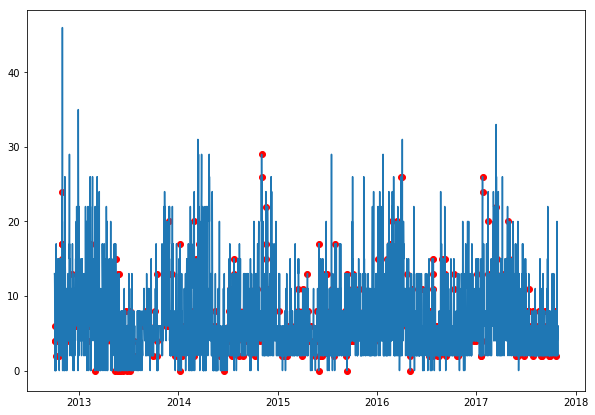

In [59]:
plt.figure(figsize = (10, 7))

plt.plot(date_df.wind_speed_mph);
plt.scatter(wind_1.index, wind_1['wind_speed_mph'], c ='r')


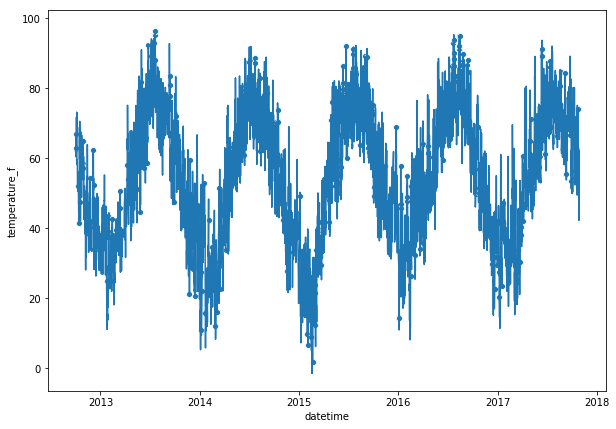

In [60]:
plt.figure(figsize=(10, 7))

sns.lineplot(x= date_df.index, y='temperature_f', data=date_df)
sns.scatterplot(x= temp_1.index, y='temperature_f', data = temp_1)

In [63]:
one_16 = one['2016']

In [66]:
temp_16 = temp_1['2016']

In [69]:
date_df_16 = date_df['2016']

Text(0.5, 1.0, 'Mapping Outages and Thunderstorms to Temperature (2015-2017)')

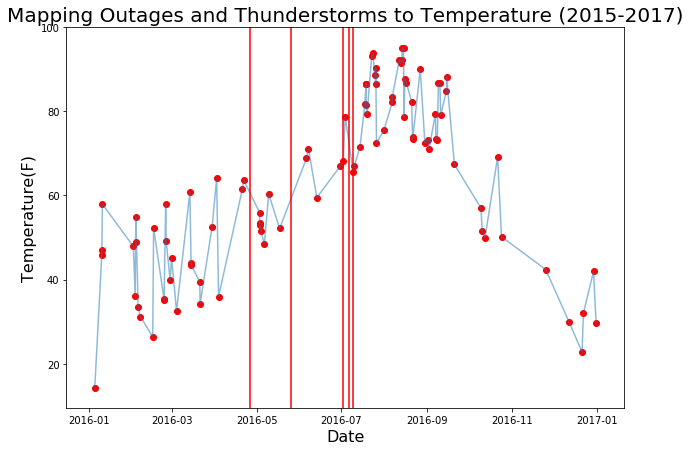

In [72]:
plt.figure(figsize=(10, 7))
plt.plot(temp_16.temperature_f, alpha = 0.5)
plt.scatter(temp_16.index, temp_16['temperature_f'], c ='r')
vlines = date_df_16[date_df_16['thunderstorm'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'red')
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.title('Mapping Outages and Thunderstorms to Temperature (2015-2017)', fontsize=20)


# plt.savefig('./images/outages_temp_thunderstorms_15_17.png')

In [74]:
one_16['2016-07']

aerial_(fly-over)  drills/exercises  environmental  fire  \
datetime                                                                        
2016-07-02 08:00:00                  0                 0              0     0   
2016-07-03 18:00:00                  0                 0              0     0   
2016-07-09 11:00:00                  0                 0              0     0   
2016-07-10 08:00:00                  0                 0              0     0   
2016-07-14 09:00:00                  0                 0              0     0   
2016-07-17 22:00:00                  0                 0              0     0   
2016-07-18 17:00:00                  0                 0              0     0   
2016-07-18 18:00:00                  0                 0              0     0   
2016-07-18 19:00:00                  0                 0              0     0   
2016-07-18 22:00:00                  0                 0              0     0   
2016-07-19 12:00:00                  0                 0              0     0   
2016-07-22 20:00:00                  0                 0              0     0   
2016-07-23 19:00:00                  0                 0              0     0   
2016-07-24 22:00:00                  0                 0              0     0   
2016-07-25 17:00:00                  0                 0              0     0   
2016-07-25 19:00:00                  0                 0              0     0   
2016-07-26 07:00:00                  0                 0              0     0   
2016-07-31 14:00:00                  0                 0              0     0   

                     infrastructure  mass_transit_disruption  \
datetime                                                       
2016-07-02 08:00:00               0                        0   
2016-07-03 18:00:00               0                        0   
2016-07-09 11:00:00               0                        0   
2016-07-10 08:00:00               0                        0   
2016-07-14 09:00:00               0                        0   
2016-07-17 22:00:00               0                        0   
2016-07-18 17:00:00               0                        0   
2016-07-18 18:00:00               0                        0   
2016-07-18 19:00:00               0                        0   
2016-07-18 22:00:00               0                        0   
2016-07-19 12:00:00               0                        0   
2016-07-22 20:00:00               0                        0   
2016-07-23 19:00:00               0                        0   
2016-07-24 22:00:00               0                        0   
2016-07-25 17:00:00               0                        0   
2016-07-25 19:00:00               0                        0   
2016-07-26 07:00:00               0                        0   
2016-07-31 14:00:00               0                        0   

                     mass_transit_restoration  missing_adult  \
datetime                                                       
2016-07-02 08:00:00                         0              0   
2016-07-03 18:00:00                         0              0   
2016-07-09 11:00:00                         0              0   
2016-07-10 08:00:00                         0              0   
2016-07-14 09:00:00                         0              0   
2016-07-17 22:00:00                         0              0   
2016-07-18 17:00:00                         0              0   
2016-07-18 18:00:00                         0              0   
2016-07-18 19:00:00                         0              0   
2016-07-18 22:00:00                         0              0   
2016-07-19 12:00:00                         0              0   
2016-07-22 20:00:00                         0              0   
2016-07-23 19:00:00                         0              0   
2016-07-24 22:00:00                         0              0   
2016-07-25 17:00:00                         0              0   
2016-07-25 19:00:00            

In [91]:
one.resample('M').mean()

aerial_(fly-over)  drills/exercises  environmental  fire  \
datetime                                                               
2012-10-31                0.0               0.0            0.0   0.0   
2012-11-30                0.0               0.0            0.0   0.0   
2012-12-31                0.0               0.0            0.0   0.0   
2013-01-31                0.0               0.0            0.0   0.0   
2013-02-28                0.0               0.0            0.0   0.0   
2013-03-31                0.0               0.0            0.0   0.0   
2013-04-30                0.0               0.0            0.0   0.0   
2013-05-31                0.0               0.0            0.0   0.0   
2013-06-30                0.0               0.0            0.0   0.0   
2013-07-31                0.0               0.0            0.0   0.0   
2013-08-31                0.0               0.0            0.0   0.0   
2013-09-30                0.0               0.0            0.0   0.0   
2013-10-31                0.0               0.0            0.0   0.0   
2013-11-30                0.0               0.0            0.0   0.0   
2013-12-31                0.0               0.0            0.0   0.0   
2014-01-31                0.0               0.0            0.0   0.0   
2014-02-28                0.0               0.0            0.0   0.0   
2014-03-31                0.0               0.0            0.0   0.0   
2014-04-30                0.0               0.0            0.0   0.0   
2014-05-31                0.0               0.0            0.0   0.0   
2014-06-30                0.0               0.0            0.0   0.0   
2014-07-31                0.0               0.0            0.0   0.0   
2014-08-31                0.0               0.0            0.0   0.0   
2014-09-30                0.0               0.0            0.0   0.0   
2014-10-31                0.0               0.0            0.0   0.0   
2014-11-30                0.0               0.0            0.0   0.0   
2014-12-31                0.0               0.0            0.0   0.0   
2015-01-31                0.0               0.0            0.0   0.0   
2015-02-28                0.0               0.0            0.0   0.0   
2015-03-31                0.0               0.0            0.0   0.0   
...                       ...               ...            ...   ...   
2015-05-31                0.0               0.0            0.0   0.0   
2015-06-30                0.0               0.0            0.0   0.0   
2015-07-31                0.0               0.0            0.0   0.0   
2015-08-31                0.0               0.0            0.0   0.0   
2015-09-30                0.0               0.0            0.0   0.0   
2015-10-31                0.0               0.0            0.0   0.0   
2015-11-30                0.0               0.0            0.0   0.0   
2015-12-31                0.0               0.0            0.0   0.0   
2016-01-31                0.0               0.0            0.0   0.0   
2016-02-29                0.0               0.0            0.0   0.0   
2016-03-31                0.0               0.0            0.0   0.0   
2016-04-30                0.0               0.0            0.0   0.0   
2016-05-31                0.0               0.0            0.0   0.0   
2016-06-30                0.0               0.0            0.0   0.0   
2016-07-31                0.0               0.0            0.0   0.0   
2016-08-31                0.0               0.0            0.0   0.0   
2016-09-30                0.0               0.0            0.0   0.0   
2016-10-31                0.0               0.0            0.0   0.0   
2016-11-30                0.0               0.0            0.0   0.0   
2016-12-31                0.0               0.0            0.0   0.0   
2017-01-31                0.0               0.0            0.0   0.0   
2017-02-28                0.0               0.0            0.0   0.0   
2017-03-31                0.0               0.0     

In [94]:
one_16['outage'].value_counts()

1    95
Name: outage, dtype: int64

In [115]:
one['2016-07']

aerial_(fly-over)  drills/exercises  environmental  fire  \
datetime                                                                        
2016-07-02 08:00:00                  0                 0              0     0   
2016-07-03 18:00:00                  0                 0              0     0   
2016-07-09 11:00:00                  0                 0              0     0   
2016-07-10 08:00:00                  0                 0              0     0   
2016-07-14 09:00:00                  0                 0              0     0   
2016-07-17 22:00:00                  0                 0              0     0   
2016-07-18 17:00:00                  0                 0              0     0   
2016-07-18 18:00:00                  0                 0              0     0   
2016-07-18 19:00:00                  0                 0              0     0   
2016-07-18 22:00:00                  0                 0              0     0   
2016-07-19 12:00:00                  0                 0              0     0   
2016-07-22 20:00:00                  0                 0              0     0   
2016-07-23 19:00:00                  0                 0              0     0   
2016-07-24 22:00:00                  0                 0              0     0   
2016-07-25 17:00:00                  0                 0              0     0   
2016-07-25 19:00:00                  0                 0              0     0   
2016-07-26 07:00:00                  0                 0              0     0   
2016-07-31 14:00:00                  0                 0              0     0   

                     infrastructure  mass_transit_disruption  \
datetime                                                       
2016-07-02 08:00:00               0                        0   
2016-07-03 18:00:00               0                        0   
2016-07-09 11:00:00               0                        0   
2016-07-10 08:00:00               0                        0   
2016-07-14 09:00:00               0                        0   
2016-07-17 22:00:00               0                        0   
2016-07-18 17:00:00               0                        0   
2016-07-18 18:00:00               0                        0   
2016-07-18 19:00:00               0                        0   
2016-07-18 22:00:00               0                        0   
2016-07-19 12:00:00               0                        0   
2016-07-22 20:00:00               0                        0   
2016-07-23 19:00:00               0                        0   
2016-07-24 22:00:00               0                        0   
2016-07-25 17:00:00               0                        0   
2016-07-25 19:00:00               0                        0   
2016-07-26 07:00:00               0                        0   
2016-07-31 14:00:00               0                        0   

                     mass_transit_restoration  missing_adult  \
datetime                                                       
2016-07-02 08:00:00                         0              0   
2016-07-03 18:00:00                         0              0   
2016-07-09 11:00:00                         0              0   
2016-07-10 08:00:00                         0              0   
2016-07-14 09:00:00                         0              0   
2016-07-17 22:00:00                         0              0   
2016-07-18 17:00:00                         0              0   
2016-07-18 18:00:00                         0              0   
2016-07-18 19:00:00                         0              0   
2016-07-18 22:00:00                         0              0   
2016-07-19 12:00:00                         0              0   
2016-07-22 20:00:00                         0              0   
2016-07-23 19:00:00                         0              0   
2016-07-24 22:00:00                         0              0   
2016-07-25 17:00:00                         0              0   
2016-07-25 19:00:00            

In [184]:
years = ['2012', '2013', '2014', '2015', '2016', '2017']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']

In [110]:
# one['Month/Year'] = one['Timestamp']apply(lambda x: "%d/%d" % (x.month, x.year))

In [191]:
lst_df_year = []
for year in years:
    lst_df_year.append(date_df[year])

In [234]:
lst_df_ones = []
for i in range(6):
    for column in date_df.columns:
        lst_df_ones.append(lst_df_year[i][lst_df_year[i][column]==1])

In [238]:
len(lst_df_ones)

342

In [250]:
len(lst_df_ones[0])

0

In [249]:
len(date_df.columns)

57

In [256]:
sub_dfs =[]
for df in lst_df_ones:
    sub_dfs.append(df.index.month.value_counts().sort_index())

In [290]:
[date_df['2012-11-10']['drills/exercises'] == 1]

[datetime
 2012-11-10 18:00:00    True
 Name: drills/exercises, dtype: bool]

In [294]:
# sub_dfs

[Series([], Name: datetime, dtype: int64), 11    1
 Name: datetime, dtype: int64, 10    13
 11     5
 12    14
 Name: datetime, dtype: int64, 10    2
 11    3
 12    6
 Name: datetime, dtype: int64, 10    2
 Name: datetime, dtype: int64, 10    13
 11    22
 12    19
 Name: datetime, dtype: int64, Series([], Name: datetime, dtype: int64), 10     5
 11     4
 12    10
 Name: datetime, dtype: int64, 10    1
 11    2
 12    1
 Name: datetime, dtype: int64, 10    2
 11    6
 12    2
 Name: datetime, dtype: int64, 10    14
 11    20
 12     3
 Name: datetime, dtype: int64, 10    1
 Name: datetime, dtype: int64, 10    24
 11    23
 12    17
 Name: datetime, dtype: int64, 10    2
 11    1
 12    2
 Name: datetime, dtype: int64, 12    1
 Name: datetime, dtype: int64, 10    14
 11     2
 12     7
 Name: datetime, dtype: int64, 11    1
 12    3
 Name: datetime, dtype: int64, Series([], Name: datetime, dtype: int64), Series([], Name: datetime, dtype: int64), Series([], Name: datetime, dtype: int64

In [295]:
one_2012 = sub_dfs[0:57]
one_2013 = sub_dfs[57:114]
one_2014 = sub_dfs[114:171]
one_2015 = sub_dfs[171:228]
one_2016 = sub_dfs[228:285]
one_2017 = sub_dfs[285:342]

In [288]:
one

[Series([], Name: datetime, dtype: int64), 11    1
 Name: datetime, dtype: int64]

In [187]:
pd.DataFrame(one_16.index.month.value_counts().sort_index(), 
             index = one_16.index.month.drop_duplicates()).rename(columns = {'datetime': 'outage'})

outage
datetime        
1              4
2             14
3              7
4              4
5              7
6              4
7             18
8             15
9             11
10             5
11             1
12             5

In [148]:
date_weather_dict = date_df[date_df['thunderstorm'] == 1]['2016'].index.value_counts().sort_index().to_dict()

In [158]:
date_weather_dict

{Timestamp('2016-04-26 08:00:00'): 1,
 Timestamp('2016-05-25 22:00:00'): 1,
 Timestamp('2016-07-01 21:00:00'): 1,
 Timestamp('2016-07-06 08:00:00'): 1,
 Timestamp('2016-07-09 00:00:00'): 1}

In [164]:
date_df[date_df['outage'] == 1]['outage']

datetime
2012-10-04 05:00:00    1
2012-10-04 10:00:00    1
2012-10-04 15:00:00    1
2012-10-08 15:00:00    1
2012-10-13 11:00:00    1
2012-10-19 03:00:00    1
2012-10-19 14:00:00    1
2012-10-21 00:00:00    1
2012-10-27 18:00:00    1
2012-10-29 07:00:00    1
2012-10-29 08:00:00    1
2012-10-29 20:00:00    1
2012-10-29 21:00:00    1
2012-10-29 22:00:00    1
2012-11-22 20:00:00    1
2012-11-24 14:00:00    1
2012-12-04 19:00:00    1
2012-12-06 12:00:00    1
2012-12-08 20:00:00    1
2012-12-15 22:00:00    1
2012-12-21 07:00:00    1
2012-12-26 06:00:00    1
2012-12-27 01:00:00    1
2013-01-12 00:00:00    1
2013-01-23 06:00:00    1
2013-01-29 20:00:00    1
2013-01-30 23:00:00    1
2013-01-31 03:00:00    1
2013-01-31 06:00:00    1
2013-02-02 14:00:00    1
                      ..
2017-06-26 09:00:00    1
2017-06-28 21:00:00    1
2017-07-05 13:00:00    1
2017-07-07 04:00:00    1
2017-07-07 11:00:00    1
2017-07-08 08:00:00    1
2017-07-13 20:00:00    1
2017-07-13 21:00:00    1
2017-07-15 00:00